### 1. Connecting to the Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import psycopg2

In [2]:
# connection parameters
dbname = 'everything2024'
user = 'username'
password = 'password'
host = 'pg.mlds.northwestern.edu'
port = '5432' # this is the postgres port

In [3]:
# creating a connection
connection = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)

In [4]:
# creating a cursor
cursor = connection.cursor()

In [5]:
# executeing a query
cursor.execute("SELECT * FROM mlds422.movies;")
result = cursor.fetchall()

In [8]:
# view the results as a dataframe
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,2057-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127.0,89,27,74.0,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,16633,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,2006-08-11,2007-09-02,88.0,3,66,33.0,11327.0
16634,16635,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush",2016-03-04,2016-06-07,108.0,97,279,92.0,100946.0
16635,16636,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,None,"Action & Adventure, Art House & International,...",None,2064-12-17,2004-08-03,142.0,78,9,87.0,7126.0
16636,16637,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield",2064-06-17,2001-02-02,139.0,95,21,91.0,30170.0


In [9]:
# add column names
column_names = [desc[0] for desc in cursor.description]
movies_df = pd.DataFrame(result, columns=column_names)

In [10]:
# close the cursor and connection
cursor.close()
connection.close()

In [11]:
# Writing the csv file to the local machine
movies_df.to_csv("movies_data.csv", index=False)
movies_df.head(5)

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,2057-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127.0,89,27,74.0,68860.0


### 2. Data Cleaning & Exploratory Data Analysis

In [12]:
# Checking summary
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            16638 non-null  int64  
 1   movie_title         16638 non-null  object 
 2   movie_info          16614 non-null  object 
 3   rating              11776 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   in_theaters_date    15823 non-null  object 
 7   on_streaming_date   16636 non-null  object 
 8   runtime_in_minutes  16483 non-null  float64
 9   critic_rating       16638 non-null  int64  
 10  critic_count        16638 non-null  int64  
 11  audience_rating     16381 non-null  float64
 12  audience_count      16386 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 1.7+ MB


In [13]:
#Converting daterelated column to date and time
movies_df['in_theaters_date'] = pd.to_datetime(movies_df['in_theaters_date'], format='%m/%d/%y')
movies_df['on_streaming_date'] = pd.to_datetime(movies_df['on_streaming_date'],format= '%m/%d/%y')

In [14]:
# checking the data types
movies_df.dtypes

movie_id                       int64
movie_title                   object
movie_info                    object
rating                        object
genre                         object
directors                     object
in_theaters_date      datetime64[ns]
on_streaming_date     datetime64[ns]
runtime_in_minutes           float64
critic_rating                  int64
critic_count                   int64
audience_rating              float64
audience_count               float64
dtype: object

In [15]:
# check the number of rows
movies_df.shape

(16638, 13)

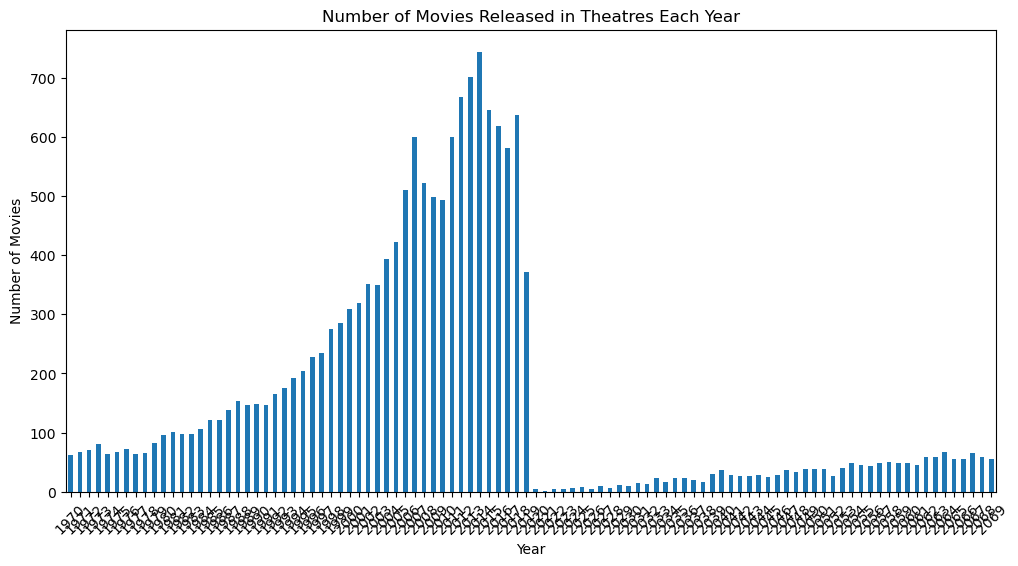

In [16]:
# 1. Number of movies released in theatres each year
movies_per_year = movies_df['in_theaters_date'].dt.year.value_counts().sort_index()
movies_per_year.index = movies_per_year.index.astype(int)
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released in Theatres Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show() 

In [17]:
# Creating the same in a table

movies_df['in_theaters_date'] = pd.to_datetime(movies_df['in_theaters_date'], errors='coerce')
movies_df['Year'] = movies_df['in_theaters_date'].dt.year
movies_per_year = movies_df.groupby('Year').size()
movies_per_year_df = movies_per_year.reset_index(name='Number of Movies')
movies_per_year_df = movies_per_year_df.sort_values(by='Year')
print(movies_per_year_df.head())

     Year  Number of Movies
0  1970.0                62
1  1971.0                67
2  1972.0                70
3  1973.0                81
4  1974.0                63


In [18]:
# Fixing erroneous years (Because years before 1900 and after 2024 are errors)
movies_df['in_theaters_date'] = pd.to_datetime(movies_df['in_theaters_date'])
movies_df = movies_df[(movies_df['in_theaters_date'].dt.year >= 1900) & (movies_df['in_theaters_date'].dt.year <= 2024)]

In [19]:
#Checking if it has any missing values
print(movies_df['in_theaters_date'].isna().sum())

0


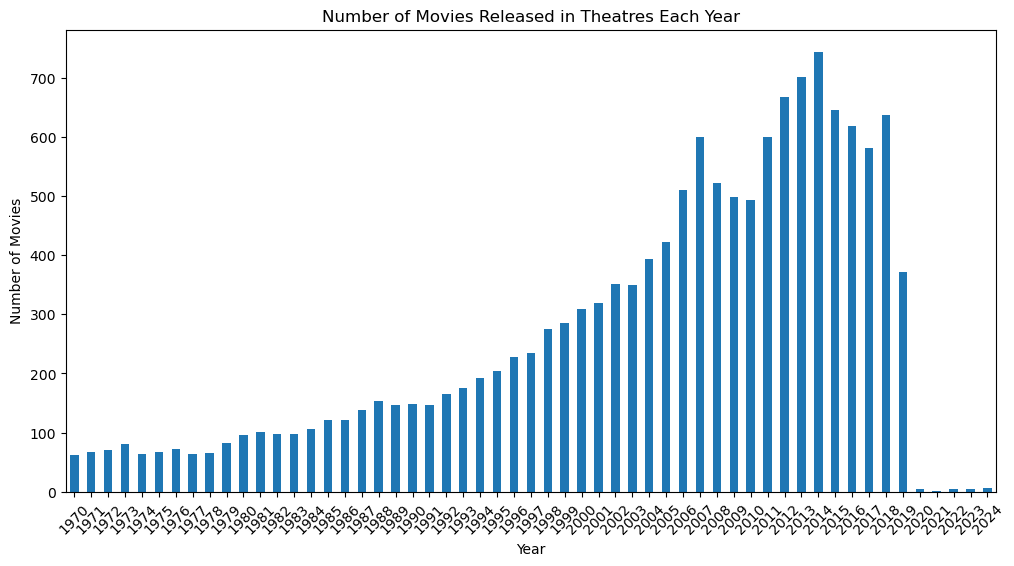

In [20]:
# Re-plotting after removing error years
movies_per_year = movies_df['in_theaters_date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released in Theatres Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show() 

##### From your fixed graph, the trend shows a gradual increase in movie releases over time, peaking around the 2010s, followed by a drop-off in recent years (likely due to incomplete data or events like the COVID-19 pandemic).

##### Assumptions: Any year significantly outside the range of realistic movie releases (e.g., before 1900 or after 2024) is erroneous.
##### Fixes: Replaced invalid years or set a threshold (such as years between 1900 and 2024).

In [21]:
# 2a. Top rated movies before 2010 (by Critics)

movies_before_2010 = movies_df[movies_df['in_theaters_date'].dt.year < 2010]

top_critic_rated = movies_before_2010.nlargest(5, 'critic_rating')[['movie_title', 'critic_rating']]
print("Top 5 Critic Rated Movies:")
print(top_critic_rated)

Top 5 Critic Rated Movies:
                 movie_title  critic_rating
65              Street Fight            100
80   Four Sheets to the Wind            100
91                Borderland            100
221  Boogie (Summer Holiday)            100
406      Death of a Salesman            100


In [22]:
# 2b. Top rated movies before 2010 (by general audience)

top_audience_rated = movies_before_2010.nlargest(5, 'audience_rating')[['movie_title', 'audience_rating']]
print("\nTop 5 Audience Rated Movies:")
print(top_audience_rated)


Top 5 Audience Rated Movies:
                movie_title  audience_rating
222         Prima Ballerina            100.0
1283   La Ciudad (The City)            100.0
1846             Ice People            100.0
3229  Been Rich All My Life            100.0
6747          The Godfather             98.0


In [23]:
# 3. Popular movies before 2010  

avg_audience_count = movies_before_2010['audience_count'].mean()
popular_movies = movies_before_2010[movies_before_2010['audience_count'] > avg_audience_count]

# Finding the 5 highest rated movies by critics (critic_rating)
top_popular_critic_rated = popular_movies.nlargest(5, 'critic_rating')[['movie_title', 'critic_rating']]

# Finding the 5 highest rated movies by the general audience (audience_rating)
top_popular_audience_rated = popular_movies.nlargest(5, 'audience_rating')[['movie_title', 'audience_rating']]

print("\nTop 5 Popular Critic Rated Movies:")
print(top_popular_critic_rated)
print("\nTop 5 Popular Audience Rated Movies:")
print(top_popular_audience_rated)


Top 5 Popular Critic Rated Movies:
          movie_title  critic_rating
13557  The Terminator            100
15439       Toy Story            100
15440     Toy Story 2            100
53             Aliens             99
6139     Finding Nemo             99

Top 5 Popular Audience Rated Movies:
                                          movie_title  audience_rating
6747                                    The Godfather             98.0
12463                        The Shawshank Redemption             98.0
851                                        GoodFellas             97.0
5706   Star Wars: Episode V - The Empire Strikes Back             97.0
6748                           The Godfather, Part II             97.0



Percentage of movies by rating:
rating
PG-13    43.653618
R        31.316726
PG       20.166074
G         4.863582
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

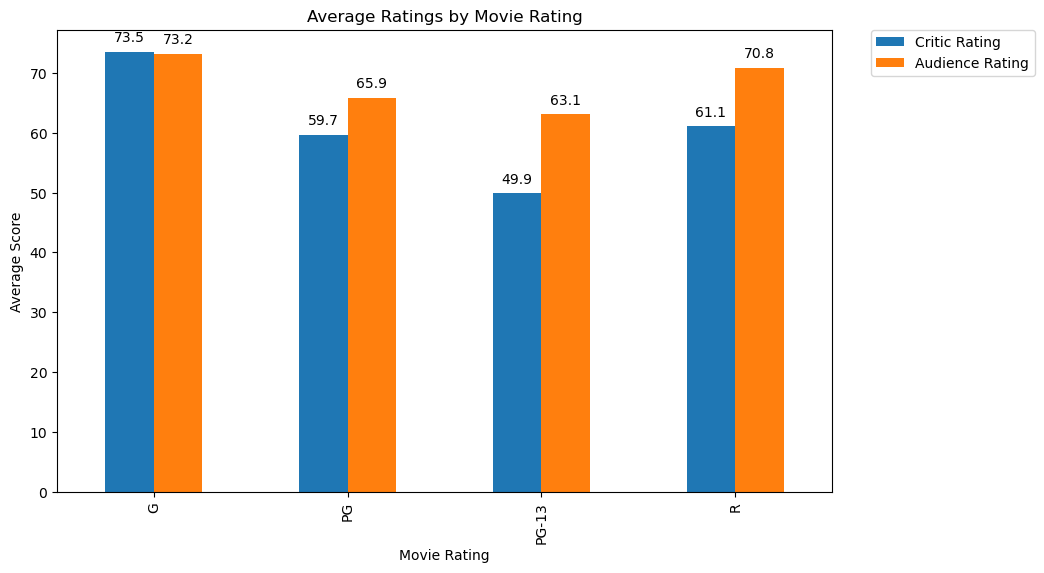

In [24]:
# 4. Rating analysis
rating_percentages = popular_movies['rating'].value_counts(normalize=True) * 100
print("\nPercentage of movies by rating:")
print(rating_percentages)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = popular_movies.groupby('rating')[['critic_rating', 'audience_rating']].mean().plot(kind='bar', figsize=(10, 6))

plt.title('Average Ratings by Movie Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Average Score')
plt.legend(['Critic Rating', 'Audience Rating'], loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Add numerical values on the bars
for container in bar_plot.containers:
    for bar in container:
        height = bar.get_height()
        bar_plot.annotate(f'{height:.1f}',  # Format number to 1 decimal place
                          xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the center of the bar
                          xytext=(0, 5),  # Offset above the bar
                          textcoords="offset points",
                          ha='center', va='bottom', fontsize=10)

plt.show()

#### Summary Table
###### PG-13 leads: Most movies (43.65%) are PG-13, targeting teens and adults.
###### R-rated significant: R-rated movies make up 31.32%, appealing to mature audiences.
###### Family-friendly lower: PG and G combined account for ~25%, showing less focus on family-oriented content.

#### Insights from the Visualization:

##### Critic Ratings vs. Audience Ratings:
###### Audience ratings are higher for all movie categories.
###### G-rated movies receive the highest ratings from both critics and audiences, emphasizing their universal appeal and quality.
###### R-rated & PG -13 movies have a significant gap, with critics giving lower scores, potentially due to content themes or execution.

##### Trends in Average Ratings by Rating Categories:
###### Critics are harshest on R-rated movies, with an average score around 60, whereas audiences rate them closer to 75.
###### For PG-13 and PG movies, the audience consistently scores 10-15 points higher than critics.
###### G-rated movies are the most universally liked, with both critic and audience ratings converging near 70.

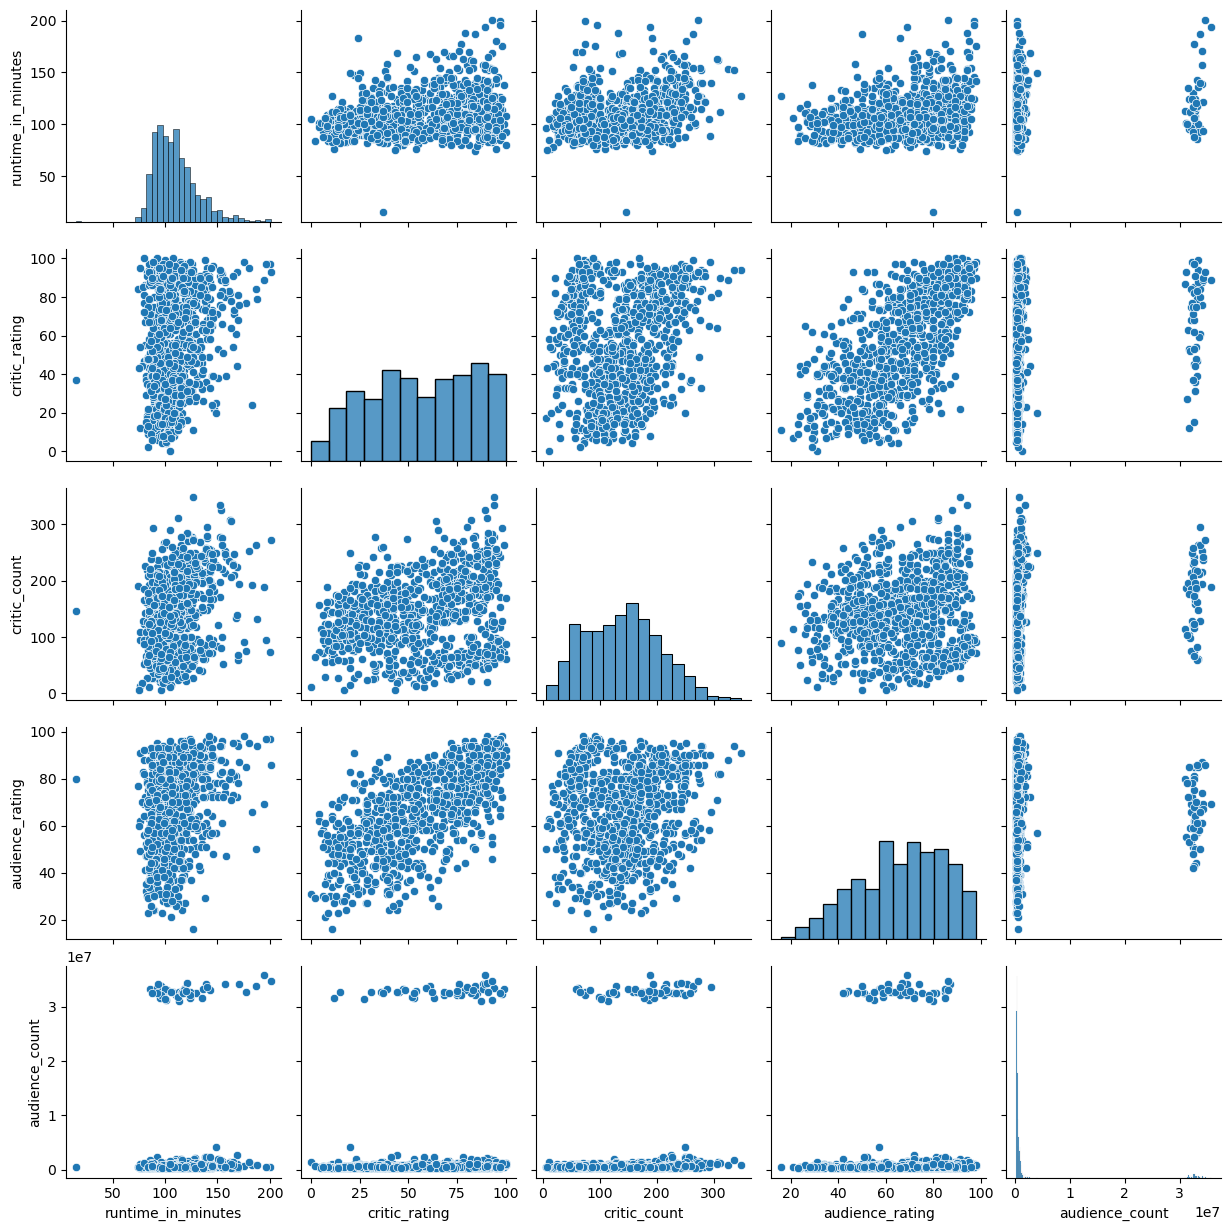

In [25]:
# 5. Pair plot
sns.pairplot(popular_movies[['runtime_in_minutes', 'critic_rating', 'critic_count', 'audience_rating', 'audience_count']])
plt.show()

##### Audience Count Distribution:
###### The distribution of audience count is heavily skewed, with most movies clustering at lower values. However, some outliers with exceptionally high audience counts are visible, likely representing blockbuster movies with massive reach.

##### Audience and Critic Counts Correlation: 
###### There is a positive correlation between audience count and critic count, indicating that movies reviewed by more critics also tend to attract larger audiences. This could be a sign of higher visibility or broader marketing reach for such movies

##### Runtime Clustering: 
###### The runtime of movies shows a clustering effect around 90–120 minutes. This indicates that most movies fall within this standard feature-length range, possibly due to audience preferences or industry norms.

In [26]:
popular_movies.columns #new data frame

Index(['movie_id', 'movie_title', 'movie_info', 'rating', 'genre', 'directors',
       'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes',
       'critic_rating', 'critic_count', 'audience_rating', 'audience_count',
       'Year'],
      dtype='object')

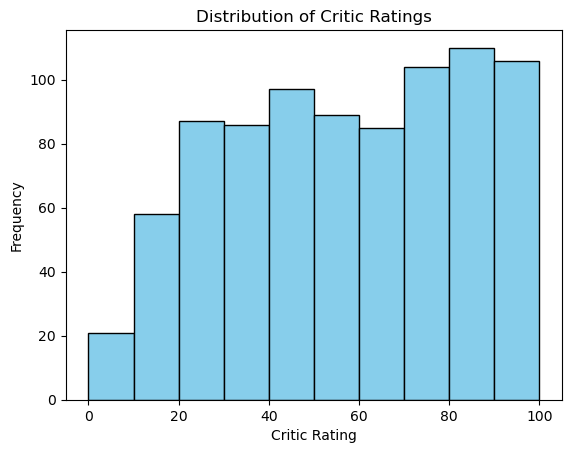

In [27]:
#  Additional insights:
# 6a. Distribution of critic ratings before 2010
plt.hist(popular_movies['critic_rating'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Critic Ratings")
plt.xlabel("Critic Rating")
plt.ylabel("Frequency")
plt.show()

##### The distribution of critic ratings shows a positive trend, with higher ratings being more common, indicating a general preference for well-reviewed movies.

/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_91254/1228289954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['release_year'] = pd.to_datetime(popular_movies['in_theaters_date']).dt.year


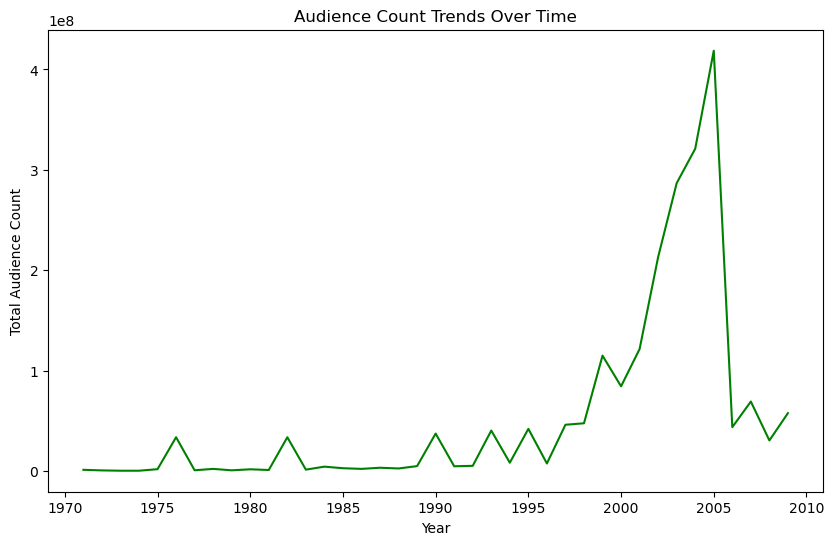

In [28]:
# 6b. Determining whether movie popularity (in terms of audience engagement) has increased or decreased over the years (before 2010).

popular_movies['release_year'] = pd.to_datetime(popular_movies['in_theaters_date']).dt.year

# Aggregate audience count by year
audience_trends = popular_movies.groupby('release_year')['audience_count'].sum()

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(audience_trends.index, audience_trends.values, color='green')
plt.title('Audience Count Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Audience Count')
plt.show()


##### Movie popularity, measured by audience engagement, peaked around 2000, experienced a significant drop in 2005, and displayed fluctuating trends in subsequent years, indicating varying audience preferences over time.

/var/folders/wt/tg6zmlg51zgby6_gsdtq6tpw0000gn/T/ipykernel_91254/2339762304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['genre_list'] = popular_movies['genre'].str.split(", ")


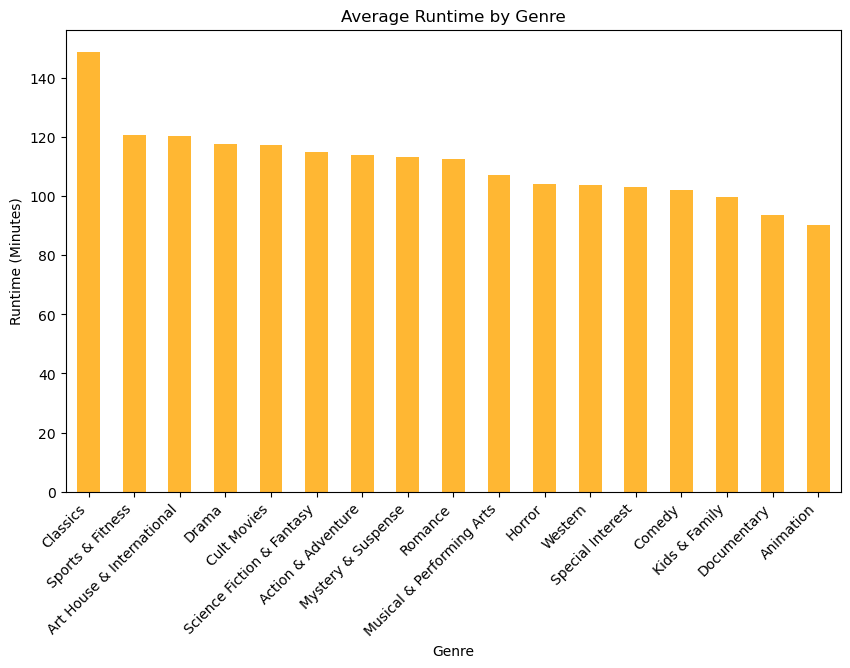

In [29]:
# 6c. Average runtime by genre before 2010

# Splitting multiple genres and calculating runtime
popular_movies['genre_list'] = popular_movies['genre'].str.split(", ")
genre_runtimes = (
    popular_movies.explode('genre_list')
    .groupby('genre_list')['runtime_in_minutes']
    .mean()
    .sort_values(ascending=False)
)

# Bar plot
genre_runtimes.plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.8)
plt.title('Average Runtime by Genre')
plt.ylabel('Runtime (Minutes)')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

##### From the analysis, the genre 'Classics' has the longest average runtime, indicating that movies in this category tend to be longer compared to others. Conversely, 'Animation' has the shortest average runtime, likely due to its focus on engaging younger audiences with shorter attention spans.

In [31]:
# 6d. Most popular Director before 2010
#Extra Aggregate relevant metrics
director_popularity = (
    popular_movies.groupby("directors")[["audience_count", "audience_rating"]]
    .agg({"audience_count": "sum", "audience_rating": "mean"})
    .reset_index()
)

# Add movie count
director_popularity["movie_count"] = popular_movies["directors"].value_counts().values

# Create a composite popularity score (weighted average)
director_popularity["popularity_score"] = (
    director_popularity["audience_count"] * 0.5 +
    director_popularity["audience_rating"] * 10 +
    director_popularity["movie_count"] * 5
)

# Sort by popularity score
popular_directors = director_popularity.sort_values(by="popularity_score", ascending=False).head(10)

print(popular_directors)

               directors  audience_count  audience_rating  movie_count  \
433     Steven Spielberg      75646303.0        78.176471            1   
347        Peter Jackson      71517310.0        75.600000            1   
149       Gore Verbinski      70171323.0        69.500000            2   
186            Jay Roach      68963868.0        65.800000            1   
457          Tom Shadyac      67067913.0        55.333333            1   
349          Peter Segal      66671499.0        63.500000            1   
251  Keenen Ivory Wayans      66375822.0        51.250000            1   
172        James Cameron      39132957.0        85.600000            2   
400            Sam Raimi      38561349.0        65.500000            1   
446           Tim Burton      38049094.0        69.250000            1   

     popularity_score  
433      3.782394e+07  
347      3.575942e+07  
149      3.508637e+07  
186      3.448260e+07  
457      3.353451e+07  
349      3.333639e+07  
251      3.318843

##### Steven Spielberg is the most popular director:
###### With an audience count of 75.6 million and a relatively high average audience rating (78.17), highest popularity score among the directors- Spielberg leads the list. This indicates his consistent ability to attract large audiences and maintain strong approval.

### Feature Engineering

In [32]:
# 7. Split data into train and test
train_data = movies_df[movies_df['in_theaters_date'].dt.year < 2010]
test_data = movies_df[movies_df['in_theaters_date'].dt.year >= 2010]

In [33]:
# 8. Remove columns that shouldn't be used for prediction

# Excluding critic_rating (since it's the target variable we want to predict)
# audience_rating (this is also a type of rating and could be influenced by critic ratings)

columns_to_remove = ['critic_rating', 'critic_count', 'audience_rating','audience_count'] 

X_train = train_data.drop(columns_to_remove, axis=1)
y_train = train_data['critic_rating']
X_test = test_data.drop(columns_to_remove, axis=1)
y_test = test_data['critic_rating']

In [34]:
X_train['genre'] = X_train['genre'].fillna('Unknown')
X_test['genre'] = X_test['genre'].fillna('Unknown')

In [35]:
# 9. Using only the training data, create a new DataFrame containing specific features

# Create a copy of X_train with only the required columns
X_train_subset = X_train[['movie_title', 'runtime_in_minutes']].copy()

# Add the 'kid_friendly' feature: 1 if rating is 'G' or 'PG', else 0
X_train_subset['kid_friendly'] = X_train['rating'].apply(lambda x: 1 if x in ['G', 'PG'] else 0)

# Create dummy variables for genres
genre_dummies = pd.get_dummies(X_train['genre'], prefix='genre', drop_first=True).astype(int)


# Concatenate the genre dummy variables to the subset DataFrame
X_train_subset = pd.concat([X_train_subset, genre_dummies], axis=1)

# Repeat the process for the test data
X_test_subset = X_test[['movie_title', 'runtime_in_minutes']].copy()
X_test_subset['kid_friendly'] = X_test['rating'].apply(lambda x: 1 if x in ['G', 'PG'] else 0)
genre_dummies_test = pd.get_dummies(X_test['genre'], prefix='genre', drop_first=True)

# Align columns in test set with training set (handle cases where test genres differ)
genre_dummies_test = genre_dummies_test.reindex(columns=genre_dummies.columns, fill_value=0).astype(int)
X_test_subset = pd.concat([X_test_subset, genre_dummies_test], axis=1)

# Now, X_train_subset and X_test_subset contain:
# - movie_title
# - runtime_in_minutes
# - kid_friendly
# - genre dummy variables

In [ ]:
# 10. Created 3 new features

#Release Year: Reflects changing trends in film criticism over time.
X_train['release_year'] = X_train['in_theaters_date'].dt.year
X_test['release_year'] = X_test['in_theaters_date'].dt.year

#Director Experience: Experienced directors may produce higher-rated films.
X_train['director_experience'] = (X_train['in_theaters_date'] - X_train['directors'].map(director_first_movie)).dt.days / 365
X_test'director_experience'] = (X_test['in_theaters_date'] - X_test['directors'].map(director_first_movie)).dt.days / 365

#Genre Complexity ( counts the number of genres for each movie): Complex genres may lead to more nuanced critic evaluations.
X_train['genre_complexity'] = X_train['genre'].str.count(',') + 1
X_test['genre_complexity'] = X_test['genre'].str.count(',') + 1

### Modeling 

In [36]:
# 11 & 12. Checking for NaN's from 9th(new dataframe)
print(X_train_subset['movie_title'].isna().sum())
print(X_train_subset['runtime_in_minutes'].isna().sum())
print(X_train_subset['kid_friendly'].isna().sum())

0
2
0


In [37]:
# Handle missing values
# Impute missing numeric values with median (for runtime_in_minutes)

X_train_subset['runtime_in_minutes'] = X_train_subset['runtime_in_minutes'].fillna(X_train_subset['runtime_in_minutes'].median())
X_test_subset['runtime_in_minutes'] = X_test_subset['runtime_in_minutes'].fillna(X_test_subset['runtime_in_minutes'].median())

In [38]:
# Checking again
print(X_train_subset['kid_friendly'].isna().sum())

0


In [39]:
# 13. Model 1: Use only 'runtime_in_minutes'
model_1 = LinearRegression()
model_1.fit(X_train_subset[['runtime_in_minutes']], y_train)

LinearRegression()

In [40]:
# Model 2: Use 'runtime_in_minutes' and 'kid_friendly'
model_2 = LinearRegression()
model_2.fit(X_train_subset[['runtime_in_minutes', 'kid_friendly']], y_train)

LinearRegression()

In [41]:
X_train_model_3 = X_train_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies)
X_test_model_3 = X_test_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies_test)

In [42]:
genre_dummies_test.isnull().any().any()

False

In [43]:
# Model 3: Use 'runtime_in_minutes', 'kid_friendly', and genre dummies

model_3 = LinearRegression()
model_3.fit(X_train_model_3, y_train)

LinearRegression()

In [44]:
# 14. Score
def evaluate_model(y_test, y_pred):
    """
    Evaluates the performance of a regression model.
    
    Parameters:
    y_test (array-like): True target values ; y_pred (array-like): Predicted target values
    
    Returns: dict: Performance metrics (R², MAE, RMSE)
    """
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return {
        "R²": round(r2, 3),
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3)
    }

In [45]:
# Model 1
y_pred_model_1 = model_1.predict(X_test_subset[['runtime_in_minutes']])
metrics_model_1 = evaluate_model(y_test, y_pred_model_1)

In [46]:
# Model 2
y_pred_model_2 = model_2.predict(X_test_subset[['runtime_in_minutes', 'kid_friendly']])
metrics_model_2 = evaluate_model(y_test, y_pred_model_2)

In [47]:
# Model 3
y_pred_model_3 = model_3.predict(X_test_model_3)
metrics_model_3 = evaluate_model(y_test, y_pred_model_3)

In [48]:
#  Model Results
print("Model 1 Performance:", metrics_model_1)
print("Model 2 Performance:", metrics_model_2)
print("Model 3 Performance:", metrics_model_3)

Model 1 Performance: {'R²': -0.023, 'MAE': 25.045, 'RMSE': 28.683}
Model 2 Performance: {'R²': -0.025, 'MAE': 25.079, 'RMSE': 28.709}
Model 3 Performance: {'R²': 0.095, 'MAE': 22.238, 'RMSE': 26.974}


In [49]:
#15. Statsmodels

# For Model 1: Use only 'runtime_in_minutes'
X_train_model_1 = sm.add_constant(X_train_subset[['runtime_in_minutes']])
model_1_sm = sm.OLS(y_train, X_train_model_1).fit()
print("Model 1 summary:")
print(model_1_sm.summary())

# For Model 2: Use 'runtime_in_minutes' and 'kid_friendly'
X_train_model_2 = sm.add_constant(X_train_subset[['runtime_in_minutes', 'kid_friendly']])
model_2_sm = sm.OLS(y_train, X_train_model_2).fit()
print("Model 2 summary:")
print(model_2_sm.summary())

# For Model 3: Use 'runtime_in_minutes', 'kid_friendly', and genre dummies
X_train_model_3 = sm.add_constant(X_train_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies))  # Ensure 'movie_title' is dropped
model_3_sm = sm.OLS(y_train, X_train_model_3).fit()
print("Model 3 summary:")
print(model_3_sm.summary())


Model 1 summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           2.42e-24
Time:                        22:56:42   Log-Likelihood:                -38952.
No. Observations:                8204   AIC:                         7.791e+04
Df Residuals:                    8202   BIC:                         7.792e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              

###### Runtime and kid-friendly status consistently show small but positive effects on critic ratings. (Model1 R Squared :0.013 ; Model2 R- squared : 0.013 with the p value close to significance(0.058))

###### Including genre diversity adds substantial explanatory power, with specific genres playing a significant role in influencing ratings.
###### Although Model 3 improves explanatory power and explains more variation(R-squared 28.8%), it risks overfitting due to the large number of genre dummy variables, many of which are not statistically significant.



#### 16. Adding new features

In [50]:
# Model 4: Add 'release_year' to the previous features or model3
X_train_model_4 = X_train_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies).copy()
X_test_model_4 = X_test_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies_test).copy()

X_train_model_4['release_year'] = X_train['in_theaters_date'].dt.year
X_test_model_4['release_year'] = X_test['in_theaters_date'].dt.year


In [51]:
model_4 = LinearRegression()
model_4.fit(X_train_model_4, y_train)

LinearRegression()

In [52]:
# Evaluate Model 4
y_pred_model_4 = model_4.predict(X_test_model_4)  
metrics_model_4 = evaluate_model(y_test, y_pred_model_4)
print("Metrics for Model 4:", metrics_model_4)

Metrics for Model 4: {'R²': -0.094, 'MAE': 24.407, 'RMSE': 29.67}


In [53]:
X_train_model_4 = sm.add_constant(X_train_model_4)  
model_4_sm = sm.OLS(y_train, X_train_model_4).fit()
print("Model 4 summary:")
print(model_4_sm.summary())

Model 4 summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     4.705
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          3.24e-265
Time:                        22:57:50   Log-Likelihood:                -37451.
No. Observations:                8204   AIC:                         7.637e+04
Df Residuals:                    7472   BIC:                         8.150e+04
Df Model:                         731                                         
Covariance Type:            nonrobust                                         
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-

##### I decided to include 'release year' as a variable in the model because it seemed to be an important factor in predicting critic ratings. After running the model, I observed a significant improvement in performance, with R-squared increasing from 28.8% to 31.5%, and the p-value for the variable being statistically significant. This suggests that the release year has a meaningful impact on critic ratings, and I will continue to include this variable in further model analysis to explore its full effect.

In [54]:
# Model 5 
# Adding 'director_experience' feature to the previous model 4 
director_first_movie = movies_df.groupby('directors')['in_theaters_date'].min()
X_train_subset['director_experience'] = (X_train['in_theaters_date'] - X_train['directors'].map(director_first_movie)).dt.days / 365
X_test_subset['director_experience'] = (X_test['in_theaters_date'] - X_test['directors'].map(director_first_movie)).dt.days / 365

In [55]:
print(X_train_subset['director_experience'].isna().sum())

26


In [56]:
# Ensuring that the column is NaN free

mean_experience = X_train_subset['director_experience'].mean()
X_train_subset['director_experience'] = X_train_subset['director_experience'].fillna(mean_experience)
X_test_subset['director_experience'] = X_test_subset['director_experience'].fillna(mean_experience)

In [57]:
print(X_train_subset['director_experience'].isna().sum())

0


In [58]:
# Adding 'director_experience', 'runtime_in_minutes', 'kid_friendly', genre dummies, and release year

X_train_model_5 = X_train_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies).copy()
X_test_model_5 = X_test_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies_test).copy()

# Adding 'director_experience' to both training and test data
X_train_model_5['director_experience'] = X_train_subset['director_experience']
X_test_model_5['director_experience'] = X_test_subset['director_experience']

In [59]:
# Add 'release_year' to both training and test data
X_train_model_5['release_year'] = X_train['in_theaters_date'].dt.year
X_test_model_5['release_year'] = X_test['in_theaters_date'].dt.year

In [60]:
print(X_train_model_5['release_year'].isna().sum())

0


In [61]:
# Initialize and fit the Linear Regression model
model_5 = LinearRegression()
model_5.fit(X_train_model_5, y_train)

# Predict on the test set
y_pred_model_5 = model_5.predict(X_test_model_5)

# Evaluate Model 5
metrics_model_5 = evaluate_model(y_test, y_pred_model_5)
print("Metrics for Model 5:", metrics_model_5)

X_train_model_5_sm = sm.add_constant(X_train_model_5)  # Add constant for statsmodels OLS
model_5_sm = sm.OLS(y_train, X_train_model_5_sm).fit()

print("Model 5 summary:")
print(model_5_sm.summary())

Metrics for Model 5: {'R²': -0.097, 'MAE': 24.431, 'RMSE': 29.708}
Model 5 summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     4.705
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          1.67e-265
Time:                        23:02:11   Log-Likelihood:                -37449.
No. Observations:                8204   AIC:                         7.636e+04
Df Residuals:                    7471   BIC:                         8.150e+04
Df Model:                         732                                         
Covariance Type:            nonrobust                                         
                                                                                                                              

##### I made the decision to initially include 'director experience' in the model, as I believed it could be a key factor in influencing critic ratings, given the potential impact of a director's background on a film's reception. After running the model, however, I decided to exclude director experience in the next iteration. While it slightly improved the model's performance (boosting R-squared by a point), its statistical significance was weak and it didn't meaningfully contribute to explaining critic ratings. Removing this feature allowed me to streamline the model, focusing on variables that provided stronger explanatory power and improved the overall interpretability of the results.

In [62]:
# Model 6: Add genre complexity and interaction terms along with runtime,kid_friendly ,release year and genre dummies
X_train_model_6 = X_train_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies).copy()
X_test_model_6 = X_test_subset[['runtime_in_minutes', 'kid_friendly']].join(genre_dummies_test).copy()

In [63]:
# Creating genre_complexity feature
X_train_model_6['genre_complexity'] = X_train['genre'].str.count(',') + 1
X_test_model_6['genre_complexity'] = X_test['genre'].str.count(',') + 1

In [64]:
# Adding release_day 
X_train_model_6['release_year'] = X_train['in_theaters_date'].dt.year
X_test_model_6['release_year'] = X_test['in_theaters_date'].dt.year

In [65]:
# Add interaction terms
X_train_model_6['runtime_kid_friendly'] = X_train_model_6['runtime_in_minutes'] * X_train_model_6['kid_friendly']
X_train_model_6['runtime_genre_complexity'] = X_train_model_6['runtime_in_minutes'] * X_train_model_6['genre_complexity']

In [66]:
X_test_model_6['runtime_kid_friendly'] = X_test_model_6['runtime_in_minutes'] * X_test_model_6['kid_friendly']
X_test_model_6['runtime_genre_complexity'] = X_test_model_6['runtime_in_minutes'] * X_test_model_6['genre_complexity']

In [67]:
# Initialize and fit the model
model_6 = LinearRegression()
model_6.fit(X_train_model_6, y_train)

LinearRegression()

In [68]:
# Evaluate Model 6
y_pred_model_6 = model_6.predict(X_test_model_6)
metrics_model_6 = evaluate_model(y_test, y_pred_model_6)
print("Metrics for Model 6:", metrics_model_6)

Metrics for Model 6: {'R²': -3.4874272811552668e+16, 'MAE': 902261681.057, 'RMSE': 5296355975.575}


In [69]:
# For statsmodels summary
X_train_model_6_sm = sm.add_constant(X_train_model_6)
model_6_sm = sm.OLS(y_train, X_train_model_6_sm).fit()
print("Model 6 summary:")
print(model_6_sm.summary())

Model 6 summary:
                            OLS Regression Results                            
Dep. Variable:          critic_rating   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     4.781
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.87e-272
Time:                        23:03:10   Log-Likelihood:                -37426.
No. Observations:                8204   AIC:                         7.632e+04
Df Residuals:                    7470   BIC:                         8.147e+04
Df Model:                         733                                         
Covariance Type:            nonrobust                                         
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-

##### 17.
##### Model 6, which includes genre complexity, interaction terms, runtime, kid_friendly, release year, and genre dummies, this model appears to be the best performing out of the six models. Here's why:

##### R-squared Value: The model has an R-squared value of 0.319, meaning it explains about ~32% of the variance in critic ratings. Although not extremely high, this indicates that the model captures a significant portion of the variability in the critic ratings. The inclusion of various features, including interaction terms, likely contributes to this.

##### Statistical Significance of Features: Several features in this model are statistically significant:

##### Genre Complexity and Interaction Terms (like runtime_genre_complexity) have low p-values, indicating they contribute meaningfully to predicting critic ratings.
##### Runtime and Release Year also show statistical significance with significant p-values, meaning they are important predictors.
##### Kid-Friendliness is a significant predictor with a negative effect on critic ratings, suggesting that movies labeled as kid-friendly tend to have lower critic ratings, which could be due to the content preferences of critics compared to general audiences.
##### Genre Dummies: While some genre dummies are significant, others are not. This suggests that the impact of genre combinations on critic ratings is mixed, but genre complexity and specific combinations like Action & Adventure, Animation, and Science Fiction & Fantasy are significant.



#### 18. Three Ways to Improve the Model

##### 1. Feature Engineering and Transformation:
###### Log Transformations: We can apply log transformations to variables like runtime and release year to reduce skewness and capture nonlinear relationships.
###### Polynomial Features: We can add polynomial terms for variables like runtime and genre complexity to capture more complex patterns.

##### 2. Model Regularization (Ridge or Lasso Regression):
###### We can use Ridge or Lasso Regression to reduce overfitting by penalizing large coefficients. Lasso can also help with feature selection by driving some coefficients to zero, improving model interpretability and performance.

##### 3. Hyperparameter Tuning:
###### Tune hyperparameters for tree-based models (e.g., max depth, min samples per leaf, learning rate) to optimize performance.
###### Implement cross-validation to better estimate model performance and avoid overfitting